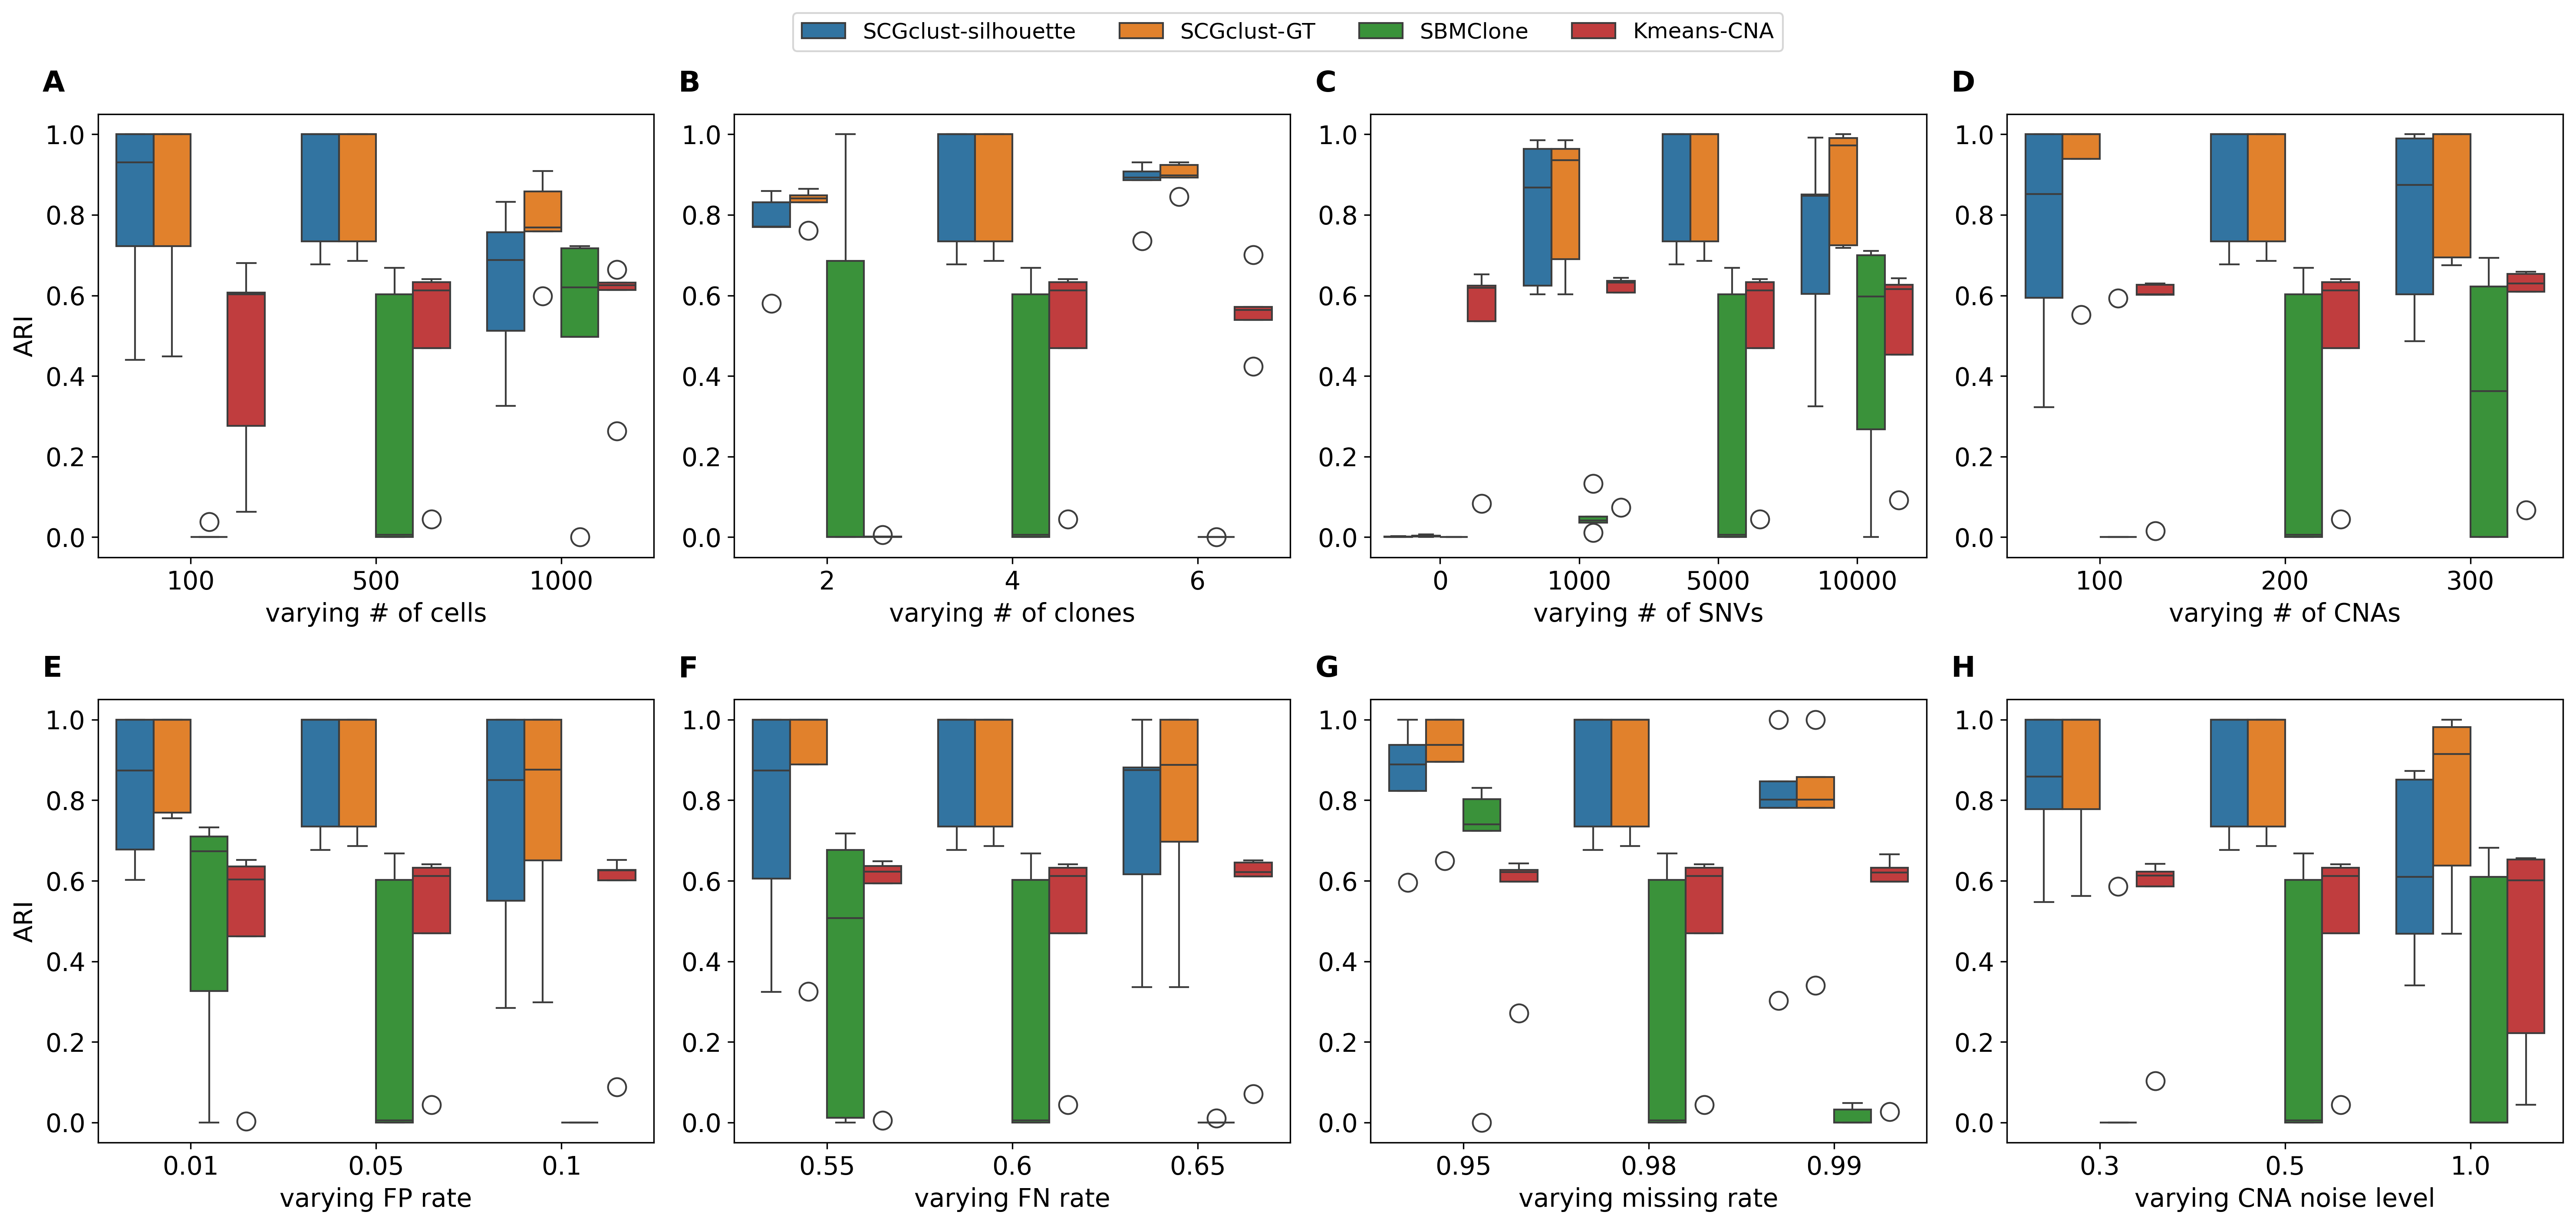

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

plt.rcParams['figure.figsize'] = (9.0, 9.0)
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['figure.dpi'] = 300
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42
plt.rcParams['lines.markersize'] = 10
plt.rcParams.update({'font.size': 14})

path = "Figures/results/figure_2_12182025.csv"
# Read the CSV file
data = pd.read_csv(path)
y_label = "ARI"
# Default settings
default_settings = {
    'varying # of clones': 4,
    'varying # of snvs': 5000,
    'varying # of cnas': 200,
    'varying # of cells': 500,
    'varying FP rate': 0.05,
    'varying FN rate': 0.6,
    'varying missing rate': 0.98,
    'varying cluster size (sd)': 0.5
}

# Subset to defaults
data_default = data.copy()
for key, value in default_settings.items():
    data_default = data_default[data_default[key] == value]

# Melt for combined plotting
# methods = ['SCGclust-euclidean', 'SCGclust-euclidean-GT', 'SBMClone', 'Kmeans-CNA']
# pick last 4 coumn names that are methods
methods = data.columns[10:].tolist()
data_melted = pd.melt(
    data,
    id_vars=list(default_settings.keys()),
    value_vars=methods,
    var_name='Methods compared',
    value_name='V-measure'
)

# Figure
fig, axes = plt.subplots(2, 4, figsize=(20, 10))

# Variables to plot
variables = ['varying # of cells', 'varying # of clones', 'varying # of snvs', 'varying # of cnas']

# Row 1: main variables
for i, var in enumerate(variables):
    # take all rows where var != default, then add the default slice (as melted) to anchor the baseline
    data_var = data_melted[data_melted[var] != default_settings[var]].copy()
    base = data_default.melt(
        id_vars=list(default_settings.keys()),
        value_vars=methods,
        var_name='Methods compared',
        value_name='V-measure'
    )
    data_var = pd.concat([base, data_var], ignore_index=True)

    sns.boxplot(x=var, y='V-measure', hue='Methods compared', data=data_var, ax=axes[0, i])
    # Pretty x-label only (keep column name intact for plotting)
    xlabel = var
    if xlabel == 'varying # of snvs':
        xlabel = 'varying # of SNVs'
    if xlabel == 'varying # of cnas':
        xlabel = 'varying # of CNAs'
    axes[0, i].set_xlabel(xlabel)

# Row 2: remaining variables
remaining_vars = [
    col for col in data.columns
    if col not in variables + methods + ['path', 'rep', 'run_time', 'best_epoch', 'missclassified']
]

for i, var in enumerate(remaining_vars):
    data_var = data_melted[data_melted[var] != default_settings[var]].copy()
    base = data_default.melt(
        id_vars=list(default_settings.keys()),
        value_vars=methods,
        var_name='Methods compared',
        value_name='V-measure'
    )
    data_var = pd.concat([base, data_var], ignore_index=True)

    ax = axes[1, i % 4]
    sns.boxplot(x=var, y='V-measure', hue='Methods compared', data=data_var, ax=ax)

    xlabel = var
    if xlabel == 'varying cluster size (sd)':
        xlabel = 'varying CNA noise level'
    ax.set_xlabel(xlabel)

# Remove per-axes legends
for ax in axes.flatten():
    if ax.get_legend() is not None:
        ax.legend_.remove()

# Global legend
handles, labels = axes[1, 0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 0.95), ncol=4, fontsize=12)

# Add subplot labels a–h in the top-left of each axis
labels_seq = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H']
for ax, lab in zip(axes.flatten(), labels_seq):
    ax.text(-0.1, 1.1, lab, transform=ax.transAxes, fontsize=16, fontweight='bold', va='top')

# Keep V-measure only on leftmost panels
for idx, ax in enumerate(axes.flatten()):
    if idx in [0, 4]:
        ax.set_ylabel("ARI")
    else:
        ax.set_ylabel("")

# Layout
plt.tight_layout(rect=[0, 0, 1, 0.92])  # leave room for the legend at top
plt.show()
# save the plot as PDF
figure_name = path.split("/")[-1].replace(".csv", ".pdf")
fig.savefig("Figures/figs/" + figure_name, bbox_inches="tight")

## For Figure 9 - ARI

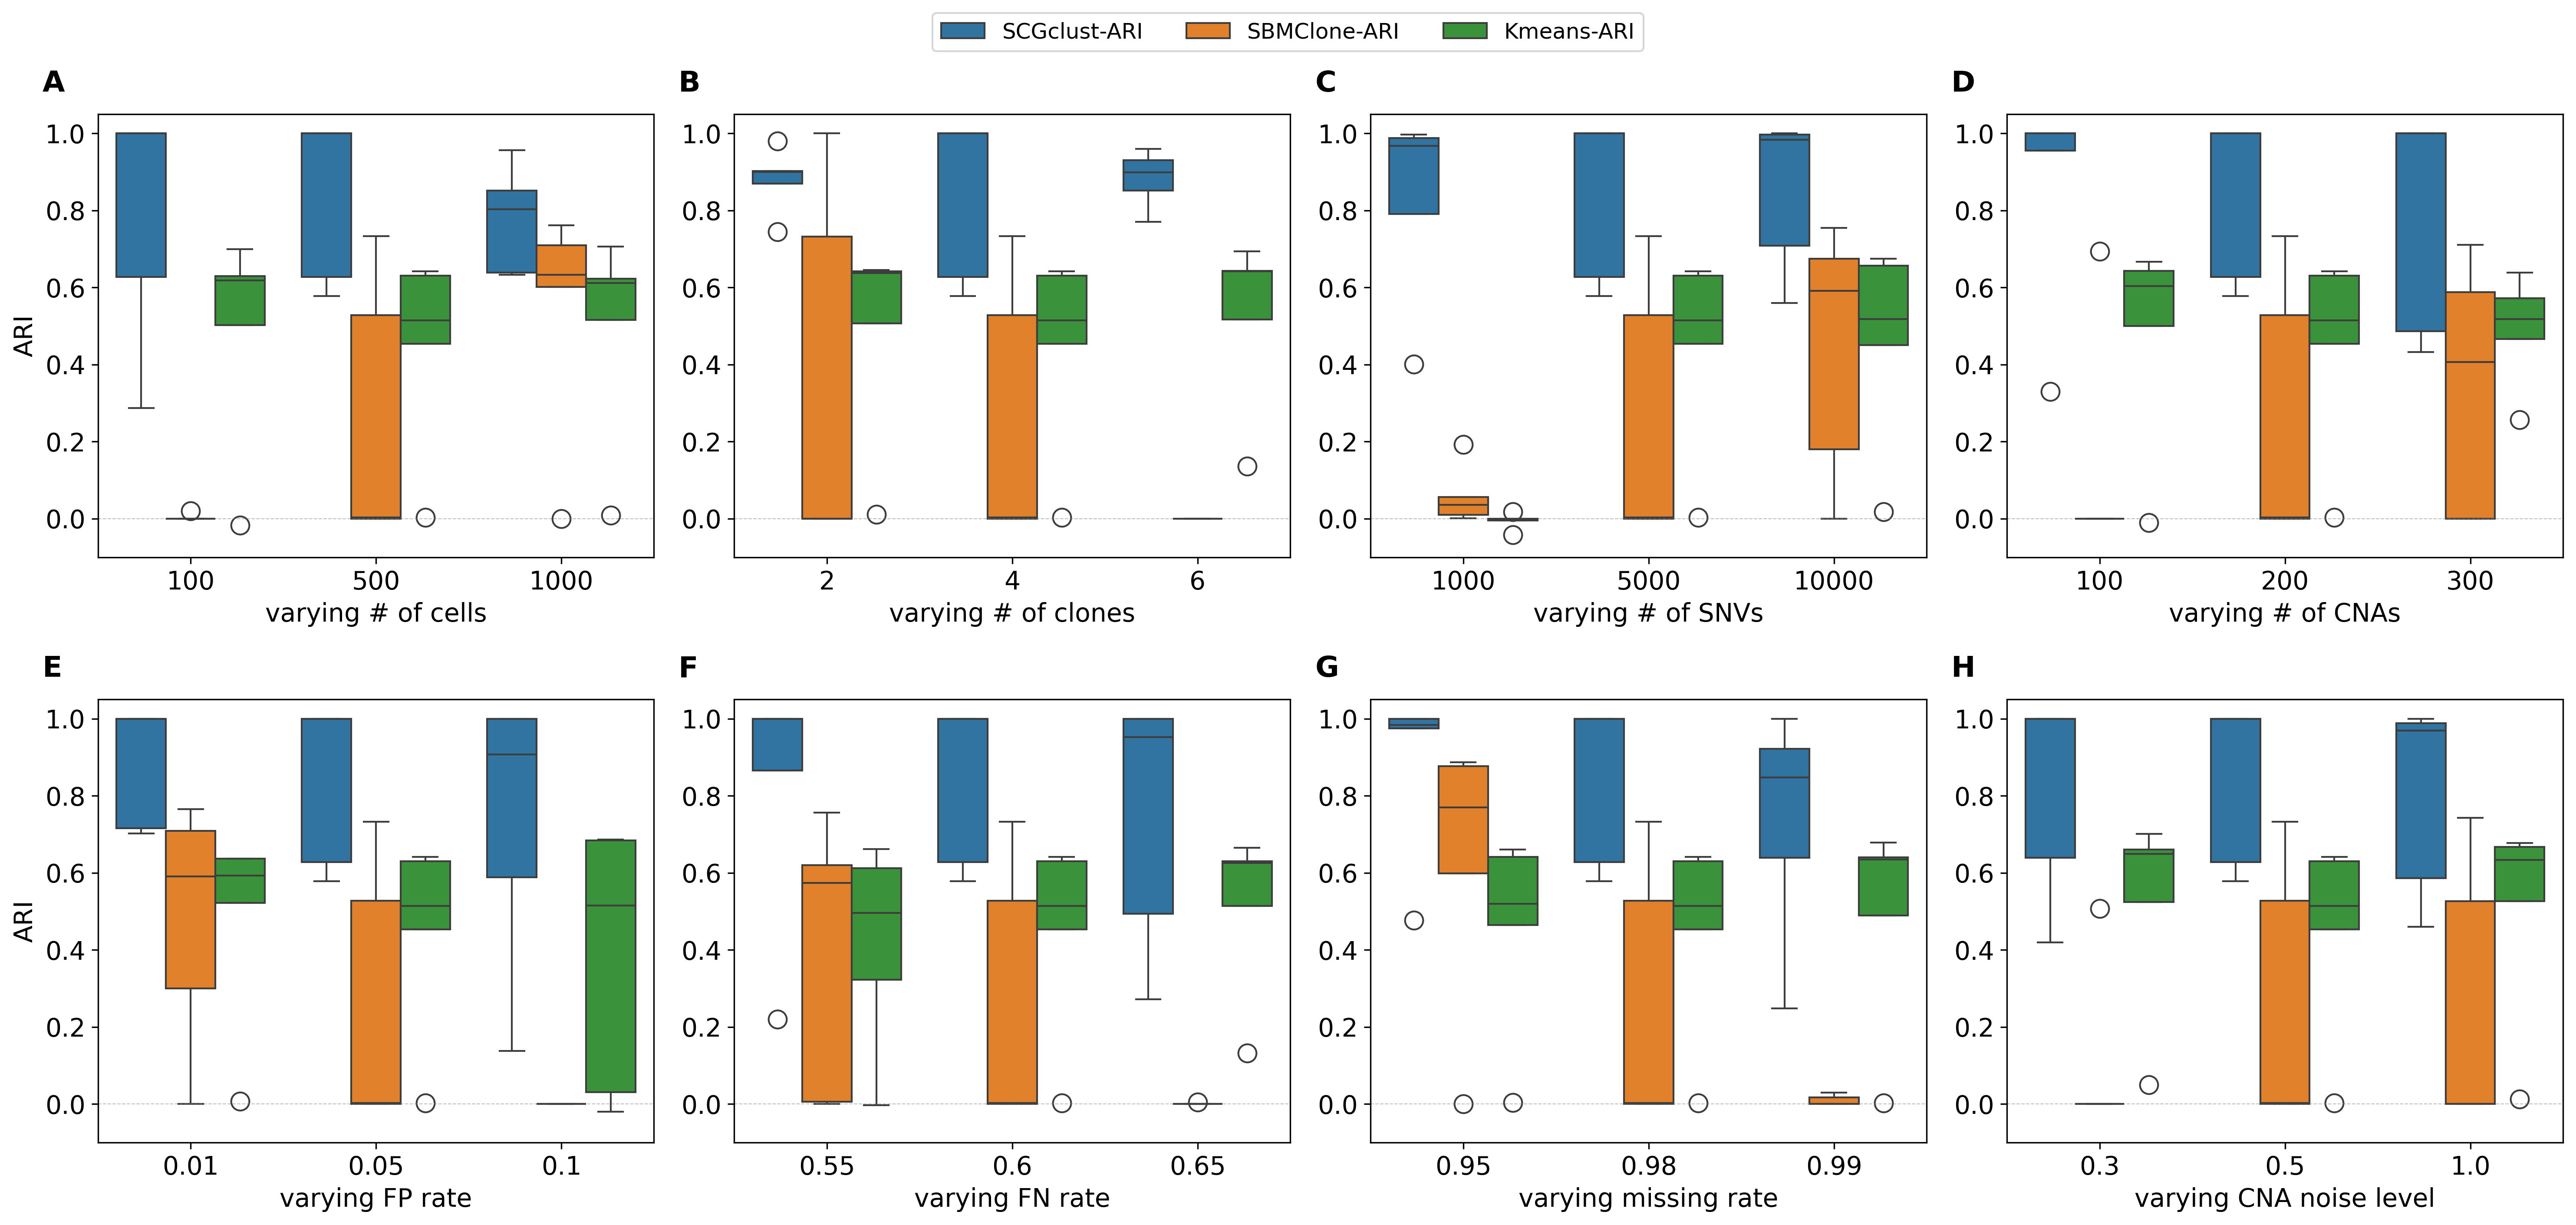

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

plt.rcParams['figure.figsize'] = (9.0, 9.0)
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['figure.dpi'] = 300
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42
plt.rcParams['lines.markersize'] = 10
plt.rcParams.update({'font.size': 14})

path = "Figures/results/figure_9_ari.csv"
# Read the CSV file
data = pd.read_csv(path)
y_label = "ARI"
# Default settings
default_settings = {
    'varying # of clones': 4,
    'varying # of snvs': 5000,
    'varying # of cnas': 200,
    'varying # of cells': 500,
    'varying FP rate': 0.05,
    'varying FN rate': 0.6,
    'varying missing rate': 0.98,
    'varying cluster size (sd)': 0.5
}

# Subset to defaults
data_default = data.copy()
for key, value in default_settings.items():
    data_default = data_default[data_default[key] == value]

# Melt for combined plotting
methods = data.columns[10:].tolist()
data_melted = pd.melt(
    data,
    id_vars=list(default_settings.keys()),
    value_vars=methods,
    var_name='Methods compared',
    value_name='ARI'  # Changed from 'V-measure' to 'ARI'
)

# Figure
fig, axes = plt.subplots(2, 4, figsize=(20, 10))

# Variables to plot
variables = ['varying # of cells', 'varying # of clones', 'varying # of snvs', 'varying # of cnas']

# Row 1: main variables
for i, var in enumerate(variables):
    data_var = data_melted[data_melted[var] != default_settings[var]].copy()
    base = data_default.melt(
        id_vars=list(default_settings.keys()),
        value_vars=methods,
        var_name='Methods compared',
        value_name='ARI'  # Changed from 'V-measure' to 'ARI'
    )
    data_var = pd.concat([base, data_var], ignore_index=True)

    sns.boxplot(x=var, y='ARI', hue='Methods compared', data=data_var, ax=axes[0, i])
    
    # Pretty x-label
    xlabel = var
    if xlabel == 'varying # of snvs':
        xlabel = 'varying # of SNVs'
    if xlabel == 'varying # of cnas':
        xlabel = 'varying # of CNAs'
    axes[0, i].set_xlabel(xlabel)
    
    # Set y-axis limits to accommodate negative values
    axes[0, i].set_ylim(-0.1, 1.05)  # ARI ranges from -1 to 1, but typically -0.1 to 1
    axes[0, i].axhline(y=0, color='gray', linestyle='--', linewidth=0.5, alpha=0.5)  # Add reference line at 0

# Row 2: remaining variables
remaining_vars = [
    col for col in data.columns
    if col not in variables + methods + ['path', 'rep', 'run_time', 'best_epoch', 'missclassified']
]

for i, var in enumerate(remaining_vars):
    data_var = data_melted[data_melted[var] != default_settings[var]].copy()
    base = data_default.melt(
        id_vars=list(default_settings.keys()),
        value_vars=methods,
        var_name='Methods compared',
        value_name='ARI'  # Changed from 'V-measure' to 'ARI'
    )
    data_var = pd.concat([base, data_var], ignore_index=True)

    ax = axes[1, i % 4]
    sns.boxplot(x=var, y='ARI', hue='Methods compared', data=data_var, ax=ax)

    xlabel = var
    if xlabel == 'varying cluster size (sd)':
        xlabel = 'varying CNA noise level'
    ax.set_xlabel(xlabel)
    
    # Set y-axis limits to accommodate negative values
    ax.set_ylim(-0.1, 1.05)  # ARI ranges from -1 to 1
    ax.axhline(y=0, color='gray', linestyle='--', linewidth=0.5, alpha=0.5)  # Add reference line at 0

# Remove per-axes legends
for ax in axes.flatten():
    if ax.get_legend() is not None:
        ax.legend_.remove()

# Global legend
handles, labels = axes[1, 0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 0.95), ncol=4, fontsize=12)

# Add subplot labels a–h in the top-left of each axis
labels_seq = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H']
for ax, lab in zip(axes.flatten(), labels_seq):
    ax.text(-0.1, 1.1, lab, transform=ax.transAxes, fontsize=16, fontweight='bold', va='top')

# Keep ARI only on leftmost panels
for idx, ax in enumerate(axes.flatten()):
    if idx in [0, 4]:
        ax.set_ylabel("ARI")
    else:
        ax.set_ylabel("")

# Layout
plt.tight_layout(rect=[0, 0, 1, 0.92])  # leave room for the legend at top
plt.show()
# save the plot as PDF
figure_name = path.split("/")[-1].replace(".csv", ".pdf")
fig.savefig("Figures/figs/" + figure_name, bbox_inches="tight")

## For FIgure 4 - architecture comparision

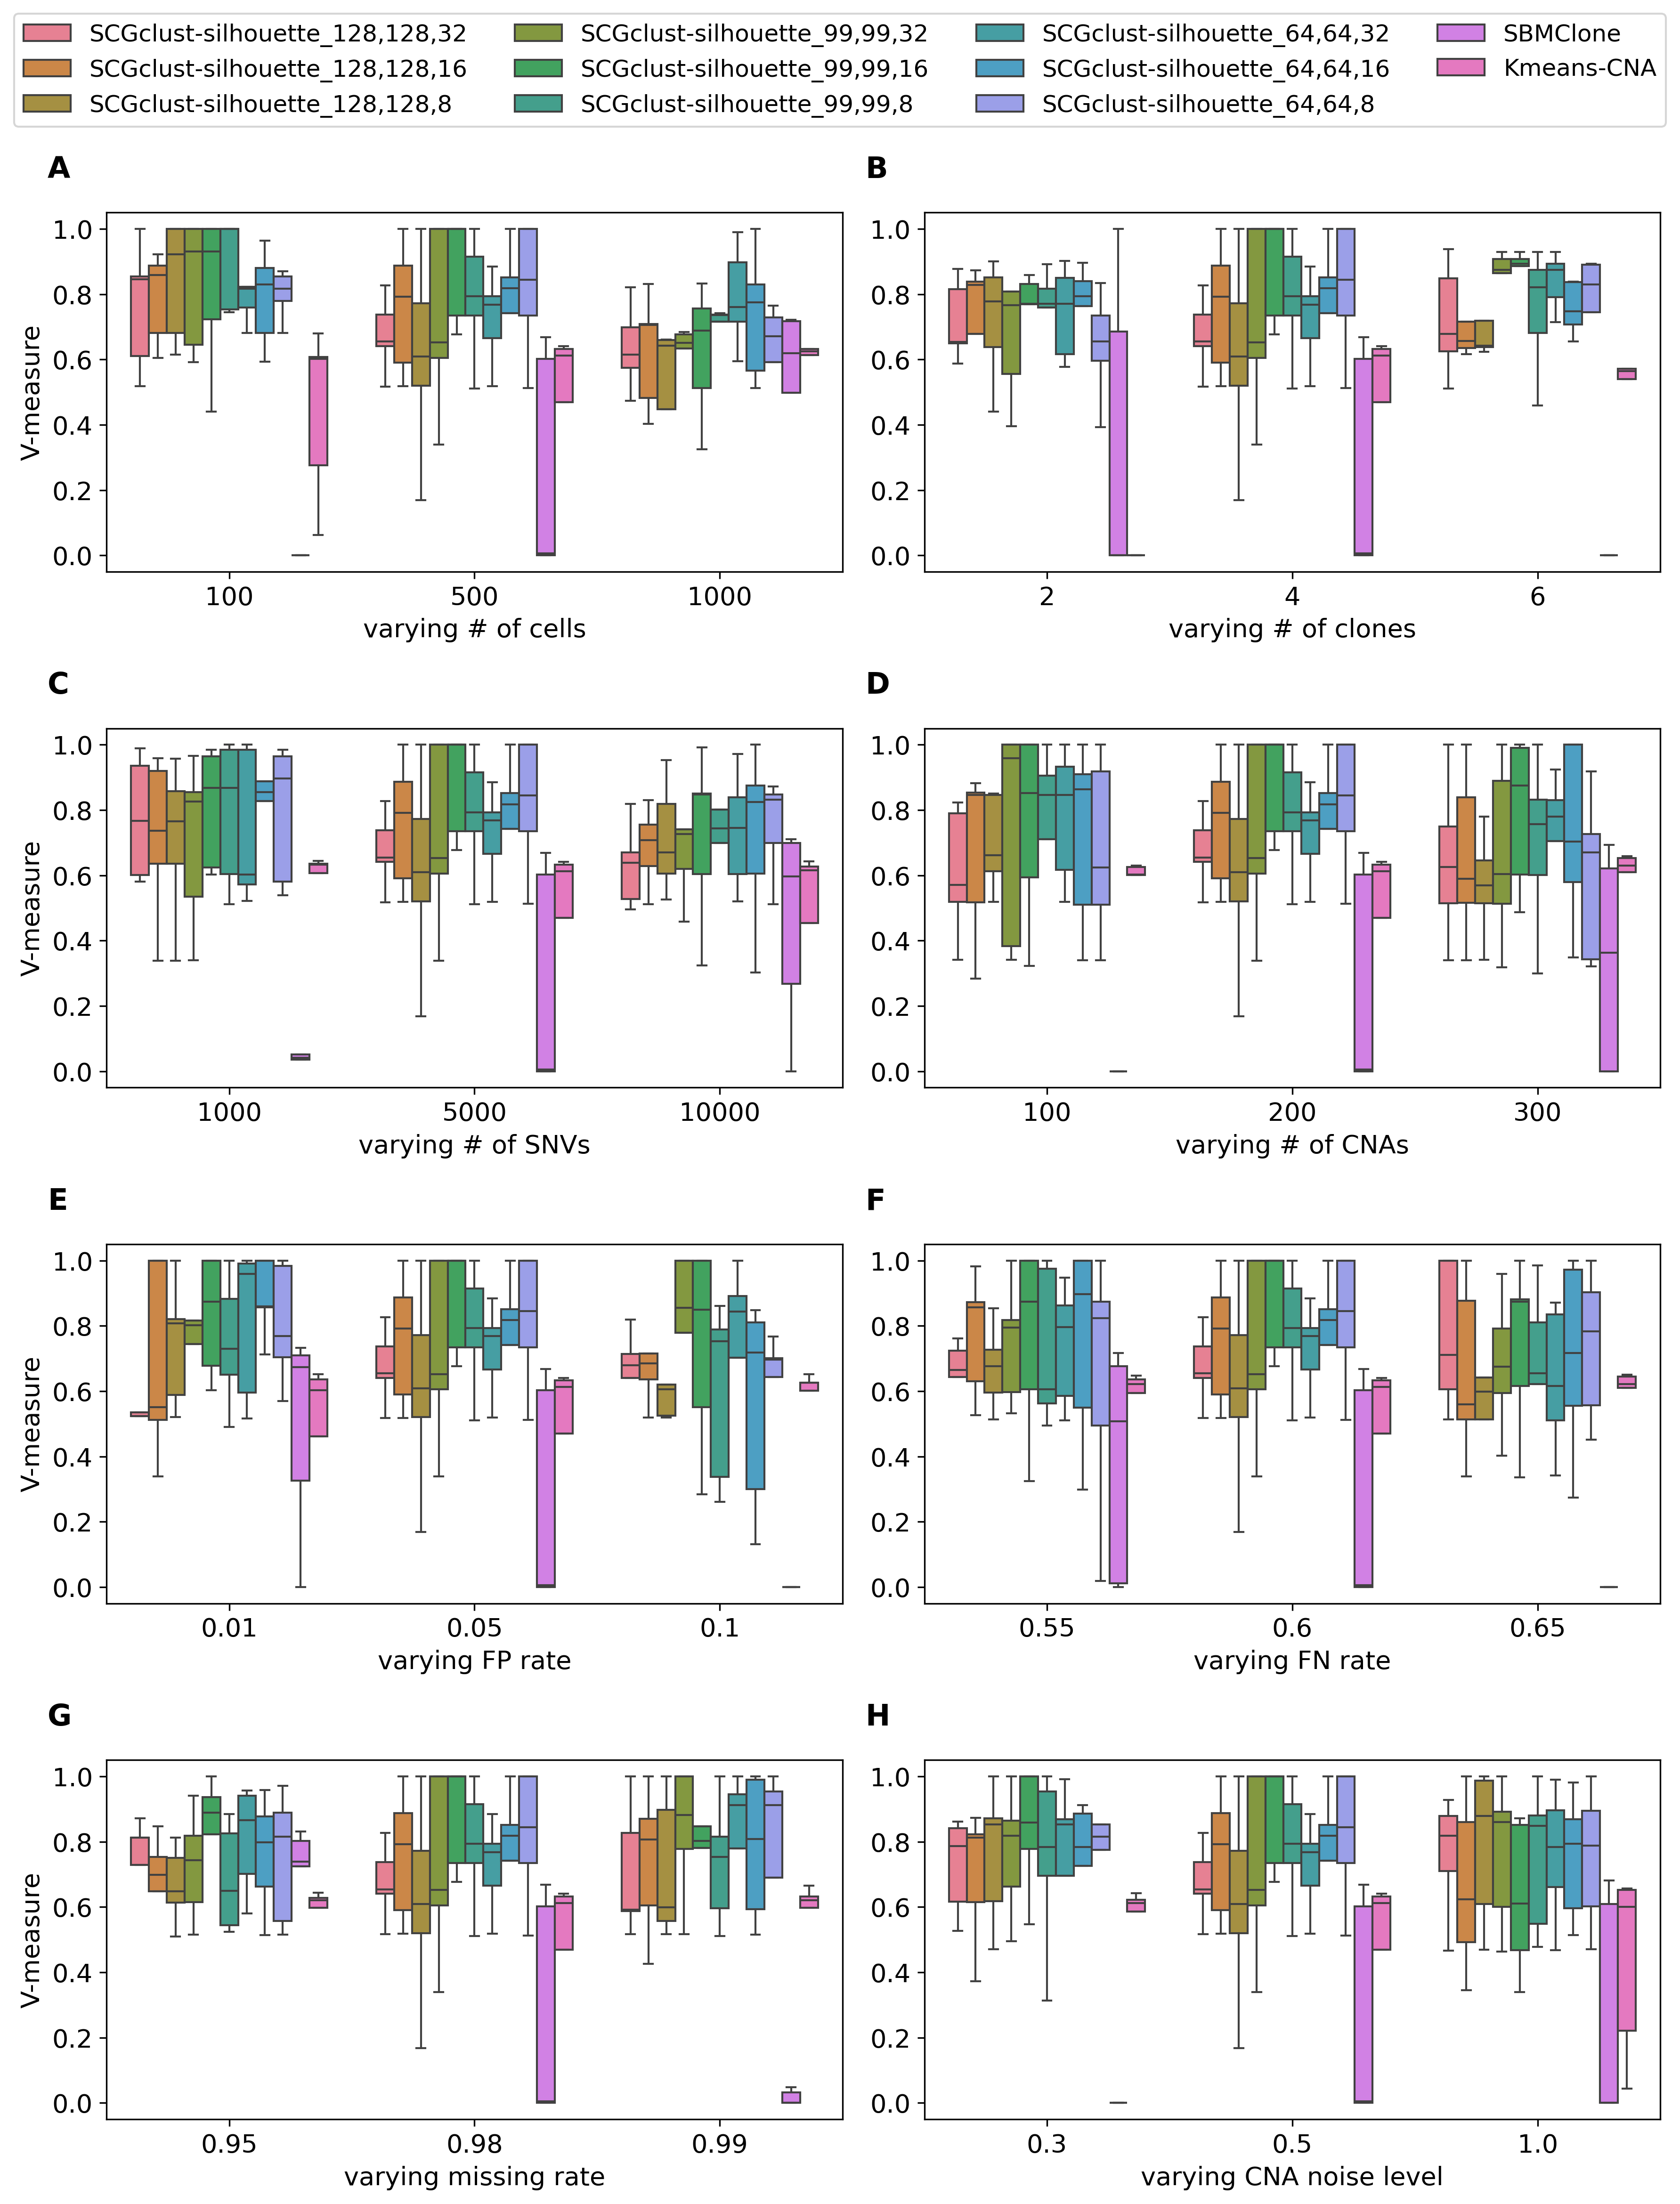

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

plt.rcParams['figure.figsize'] = (9.0, 9.0)   # taller portrait layout
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['figure.dpi'] = 300
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42
plt.rcParams['lines.markersize'] = 10
plt.rcParams.update({'font.size': 13})

path = "Figures/results/figure_4.csv"

# Read the CSV file
data = pd.read_csv(path)

# Default settings (baseline slice)
default_settings = {
    'varying # of clones': 4,
    'varying # of snvs': 5000,
    'varying # of cnas': 200,
    'varying # of cells': 500,
    'varying FP rate': 0.05,
    'varying FN rate': 0.6,
    'varying missing rate': 0.98,
    'varying cluster size (sd)': 0.5
}

# Subset to defaults for baseline rows
data_default = data.copy()
for key, value in default_settings.items():
    data_default = data_default[data_default[key] == value]

# Methods = last 4 columns
methods = data.columns[10:].tolist()

# Melt full table once
data_melted = pd.melt(
    data,
    id_vars=list(default_settings.keys()),
    value_vars=methods,
    var_name='Methods compared',
    value_name='V-measure'
)

# Variables to plot (8 total -> 4x2 grid)
main_vars = ['varying # of cells', 'varying # of clones', 'varying # of snvs', 'varying # of cnas']
remaining_vars = [
    col for col in data.columns
    if col not in main_vars + methods + ['path', 'rep', 'run_time', 'best_epoch', 'missclassified']
]
# Ensure exactly 8 (main 4 + first 4 remaining)
plot_vars = main_vars + remaining_vars[:4]

# Pretty label mapper
pretty = {
    'varying # of snvs': 'varying # of SNVs',
    'varying # of cnas': 'varying # of CNAs',
    'varying cluster size (sd)': 'varying CNA noise level'
}

fig, axes = plt.subplots(4, 2, figsize=(12, 16))
axes = axes.flatten()

for i, var in enumerate(plot_vars):
    ax = axes[i]

    # slice rows where this var differs from default + add baseline rows
    data_var = data_melted[data_melted[var] != default_settings[var]].copy()
    base = data_default.melt(
        id_vars=list(default_settings.keys()),
        value_vars=methods,
        var_name='Methods compared',
        value_name='V-measure'
    )
    data_var = pd.concat([base, data_var], ignore_index=True)
    
    sns.boxplot(
        x=var, y='V-measure', hue='Methods compared',
        data=data_var, ax=ax, showfliers=False
    )
    
    # x label prettified; rotate ticks for readability
    ax.set_xlabel(pretty.get(var, var))
    ax.tick_params(axis='x')

    # remove per-axes legends (we'll add a global one)
    if ax.get_legend() is not None:
        ax.legend_.remove()

# Subplot labels A–H
labels_seq = list("ABCDEFGH")
for ax, lab in zip(axes, labels_seq):
    ax.text(-0.08, 1.08, lab, transform=ax.transAxes,
            fontsize=15, fontweight='bold', va='bottom')

# Y-label only on left column (indices 0,2,4,6)
for idx, ax in enumerate(axes):
    if idx % 2 == 0:
        ax.set_ylabel("V-measure")
    else:
        ax.set_ylabel("")

# Global legend at top-center
# handles, labels = axes[0].get_legend_handles_labels()
# fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 0.98), ncol=len(labels), fontsize=12)
# Global legend at top-center
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(
    handles,
    labels,
    loc='upper center',
    bbox_to_anchor=(0.5, 0.98),
    ncol=4,                # ✅ force 4 columns
    fontsize=12
)
# Tight layout with room for legend
plt.tight_layout(rect=[0, 0, 1, 0.925])

# save the plot as PDF
figure_name = path.split("/")[-1].replace(".csv", ".pdf")
fig.savefig("Figures/figs/" + figure_name, bbox_inches="tight")
# Show & save
plt.show()

Index(['path', 'rep', 'varying # of clones', 'varying # of snvs',
       'varying # of cnas', 'varying # of cells', 'varying FP rate',
       'varying FN rate', 'varying missing rate', 'varying cluster size (sd)',
       'SCGclust-silhouette-euclidean', 'SCGclust-silhouette-dot',
       'SCGclust-silhouette-cosine', 'SCGclust-silhouette-pearson'],
      dtype='object')
varying # of cells
varying # of clones
varying # of snvs
varying # of cnas


KeyError: 'SCGclust-silhouette-euclidean'

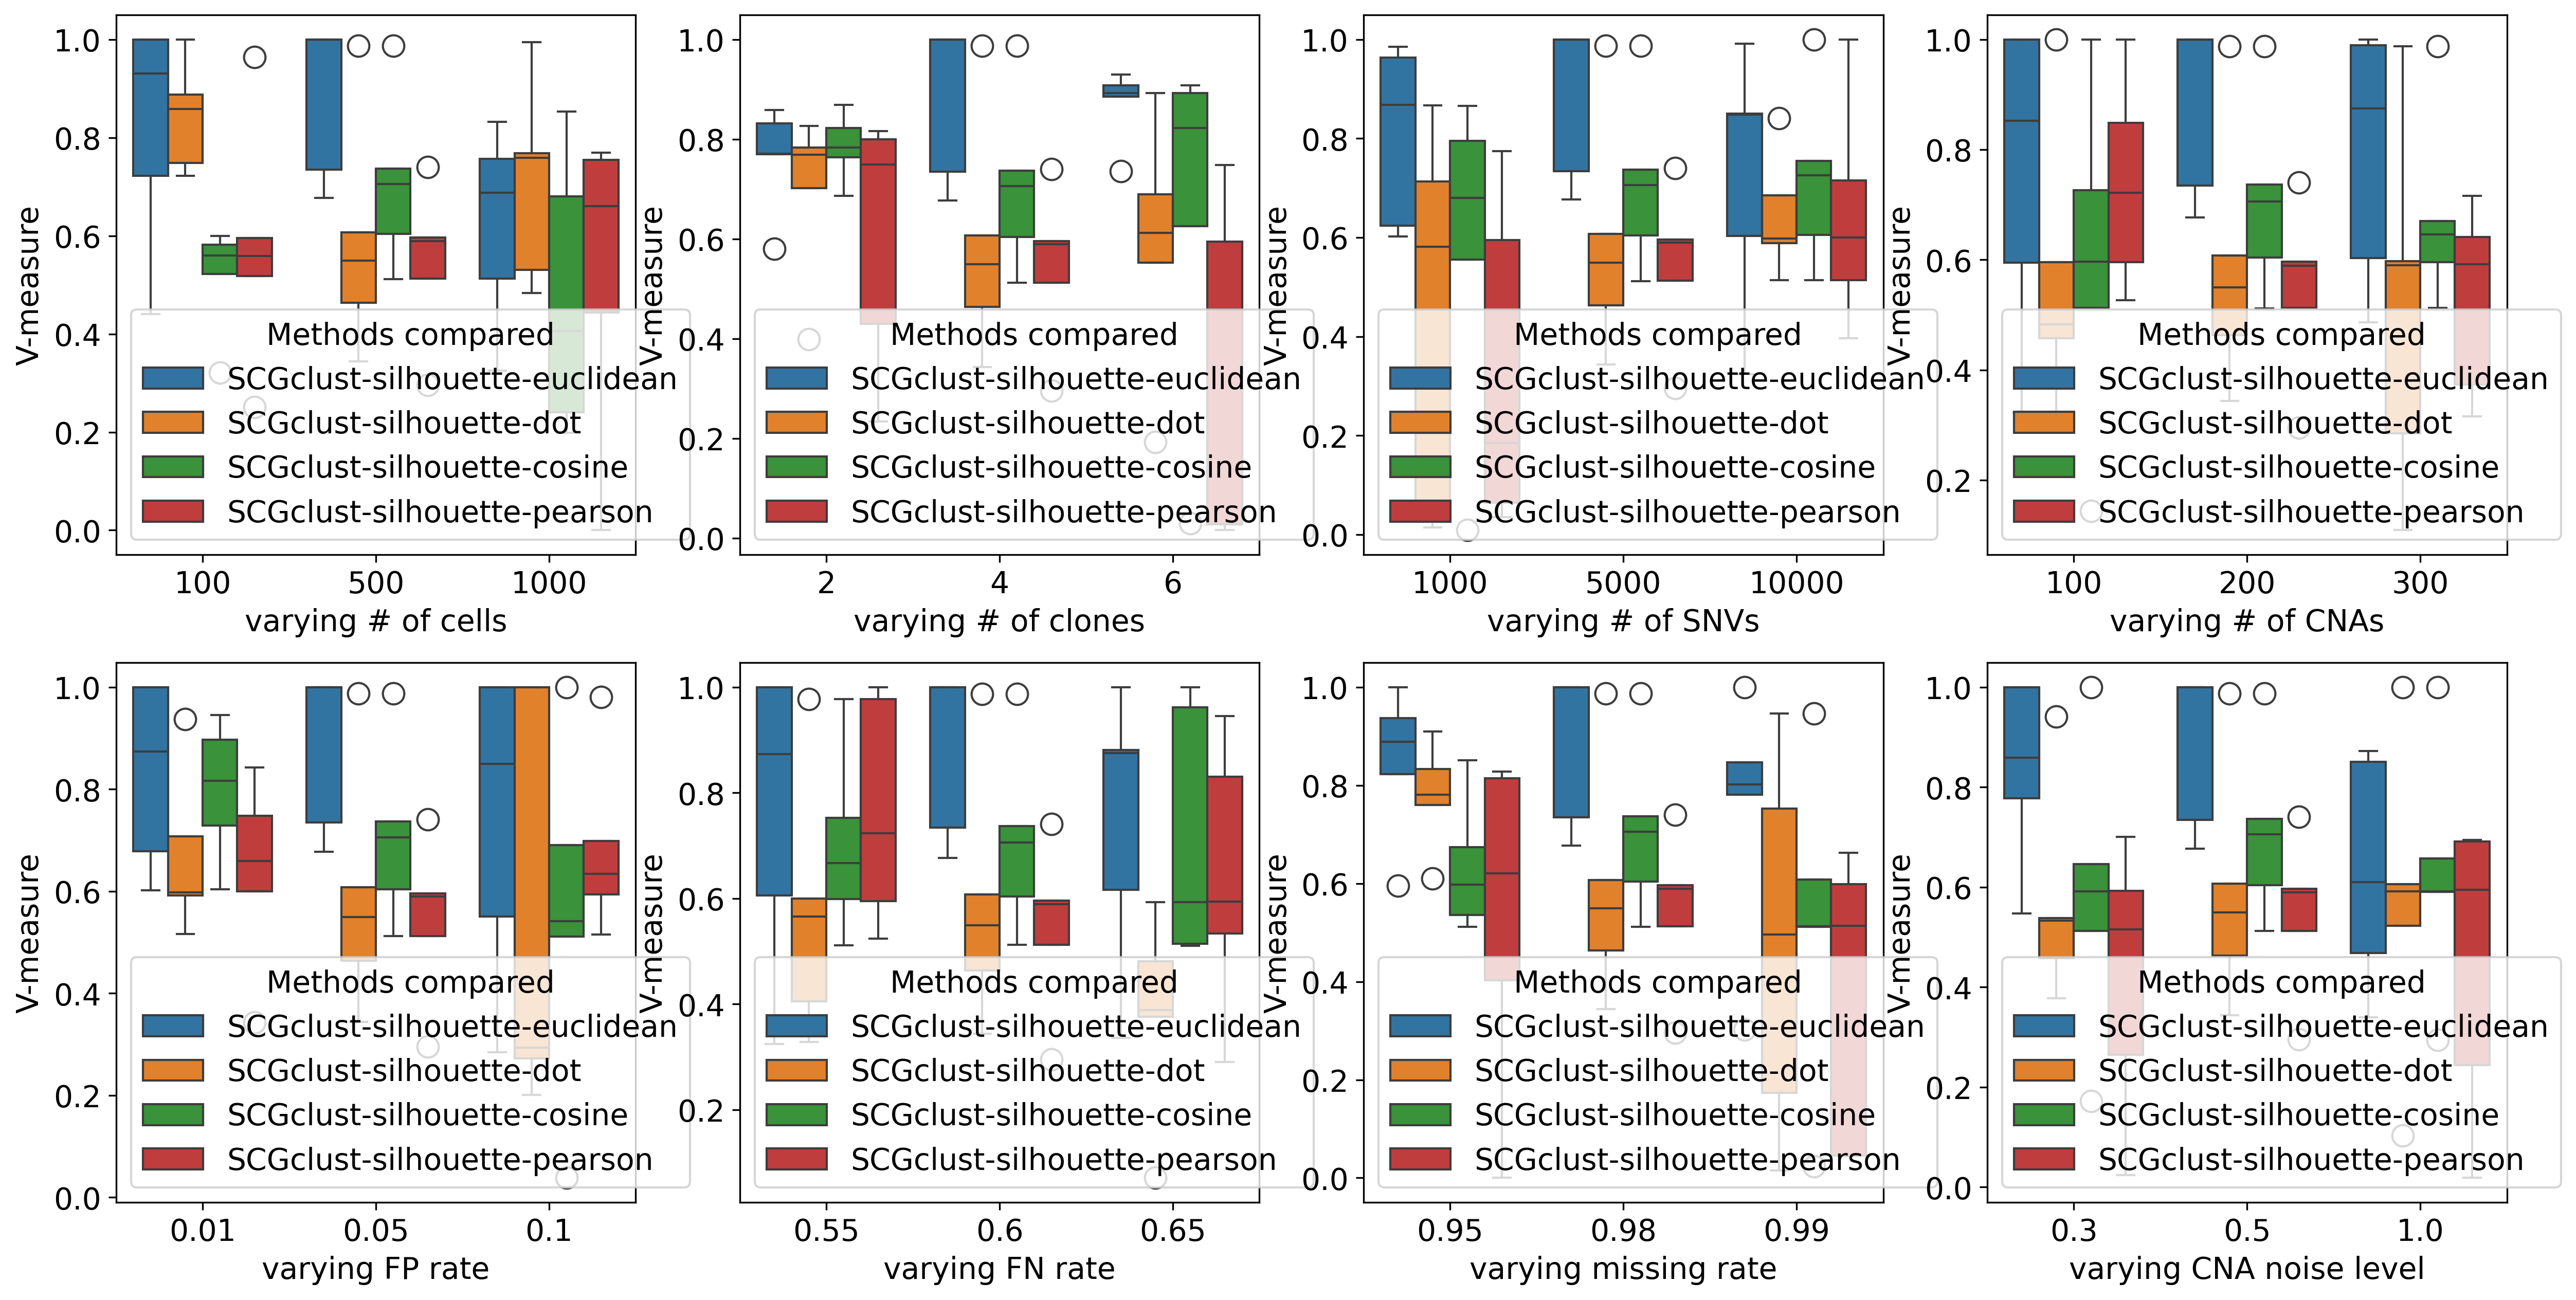

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

plt.rcParams['figure.figsize'] = (9.0, 9.0)
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['figure.dpi'] = 300
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42
plt.rcParams['lines.markersize'] = 10

# Set global font size
plt.rcParams.update({'font.size': 14})  # Change the number to your desired font size
#plt.tight_layout(pad=10.0)  # Increase the padding

# Read the CSV file
#data = pd.read_csv("simulation_06242024/results_combined.csv")
data = pd.read_csv("Figures/results/feature_extraction.csv")
print(data.columns)
# Get the default settings
default_settings = {
    'varying # of clones': 4,
    'varying # of snvs': 5000,
    'varying # of cnas': 200,
    'varying # of cells': 500,
    'varying FP rate': 0.05,
    'varying FN rate': 0.6,
    'varying missing rate': 0.98,
    'varying cluster size (sd)': 0.5
}

# Get the data with the default settings
data_default = data.copy()
for key, value in default_settings.items():
    data_default = data_default[data_default[key] == value]

# Melt the data for combined plotting
data_melted = pd.melt(data, id_vars=list(default_settings.keys()), value_vars=['SCGclust-silhouette-euclidean',	'SCGclust-silhouette-dot',	'SCGclust-silhouette-cosine',	'SCGclust-silhouette-pearson'],
                      var_name='Methods compared', value_name='V-measure')

# Setting up the figure and axes
fig, axes = plt.subplots(2, 4, figsize=(20, 10))

# Variables to plot
variables = ['varying # of cells', 'varying # of clones', 'varying # of snvs', 'varying # of cnas']
#variables = ['cell', 'clone', 'snv', 'cna']

# Iterate over the variables to create boxplots
for i, var in enumerate(variables):
    
    data_var = data_melted[data_melted[var] != default_settings[var]].copy()
    data_var = pd.concat([data_default.melt(id_vars=list(default_settings.keys()), 
                                            value_vars=['SCGclust-silhouette-euclidean',	'SCGclust-silhouette-dot',	'SCGclust-silhouette-cosine',	'SCGclust-silhouette-pearson'],
                                            var_name='Methods compared', value_name='V-measure'), data_var])
    
    sns.boxplot(x=var, y='V-measure', 
                hue='Methods compared', 
                data=data_var, ax=axes[0, i])
    print(var)
    if var == 'varying # of snvs':
        var = 'varying # of SNVs'
    if var == 'varying # of cnas':
        var = 'varying # of CNAs'
    #axes[0, i].set_title(f'V-measure vs {var}')
    axes[0, i].set_xlabel(var)
    #axes[0, i].set_ylabel('Value')

# Remaining variables
remaining_vars = [col for col in data.columns if col not in variables + ['SCGclust-dot',	'SCGclust-GT',	'SBMClone',	'Kmeans-CNA','path', 'rep', 'run_time', 'best_epoch', 'missclassified']]

# Iterate over the remaining variables to create boxplots
for i, var in enumerate(remaining_vars):
    # print(data_var)
    data_var = data_melted[data_melted[var] != default_settings[var]].copy()
    data_var = pd.concat([data_default.melt(id_vars=list(default_settings.keys()), 
                                            value_vars=['SCGclust-silhouette-euclidean', 'SCGclust-silhouette-dot',	'SCGclust-silhouette-cosine',	'SCGclust-silhouette-pearson'], 
                                            var_name='Methods compared', value_name='V-measure'), data_var])
    # print(data_var)
    sns.boxplot(x=var, y='V-measure', hue='Methods compared', data=data_var, ax=axes[1, i % 4])
#    axes[1, i % 4].set_title(f'V-measure vs {var}')
    # varying CNA noise level
    if var == 'varying cluster size (sd)':
        var = 'varying CNA noise level'
    axes[1, i % 4].set_xlabel(var)
#    axes[1, i % 4].set_ylabel('Value')

for ax in axes.flatten():
    ax.legend_.remove()

# Add legend for the second row
handles, labels = axes[1, 0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 0.95), ncol=4, fontsize=12)

# Adjust layout to prevent overlap
plt.tight_layout(rect=[0, 0, 0, 0])  # Leave space for the legend on the top
#plt.tight_layout()

#plt.tight_layout()
# plt.savefig('/maiziezhou_lab/yunfei/Projects/cellClustering_GNN/results_for_plotting/simulated_data_bp0122.pdf', format='pdf')
plt.show()

#TODO: REmove V-measure on the y axis except the two leftmost subfigures. Add a, b, c, d, e, f, g, h. 

In [6]:
result_df_122 = pd.read_csv("results/results_combined0122.csv")
results_df_dot = pd.read_csv("results/simulation_benchmarking_1014_fe_all_results.csv")

# add the SCGclust-silhouette results to results_df_dot
results_df_dot = results_df_dot.merge(result_df_122[['path', 'SCGclust-silhouette']], on='path', how='left')
# save the updated dataframe
results_df_dot.to_csv("results/simulation_benchmarking_1014_fe_all_results.csv", index=False)

## Plot for varying feature extraction methods

varying # of cells
varying # of clones
varying # of snvs
varying # of cnas


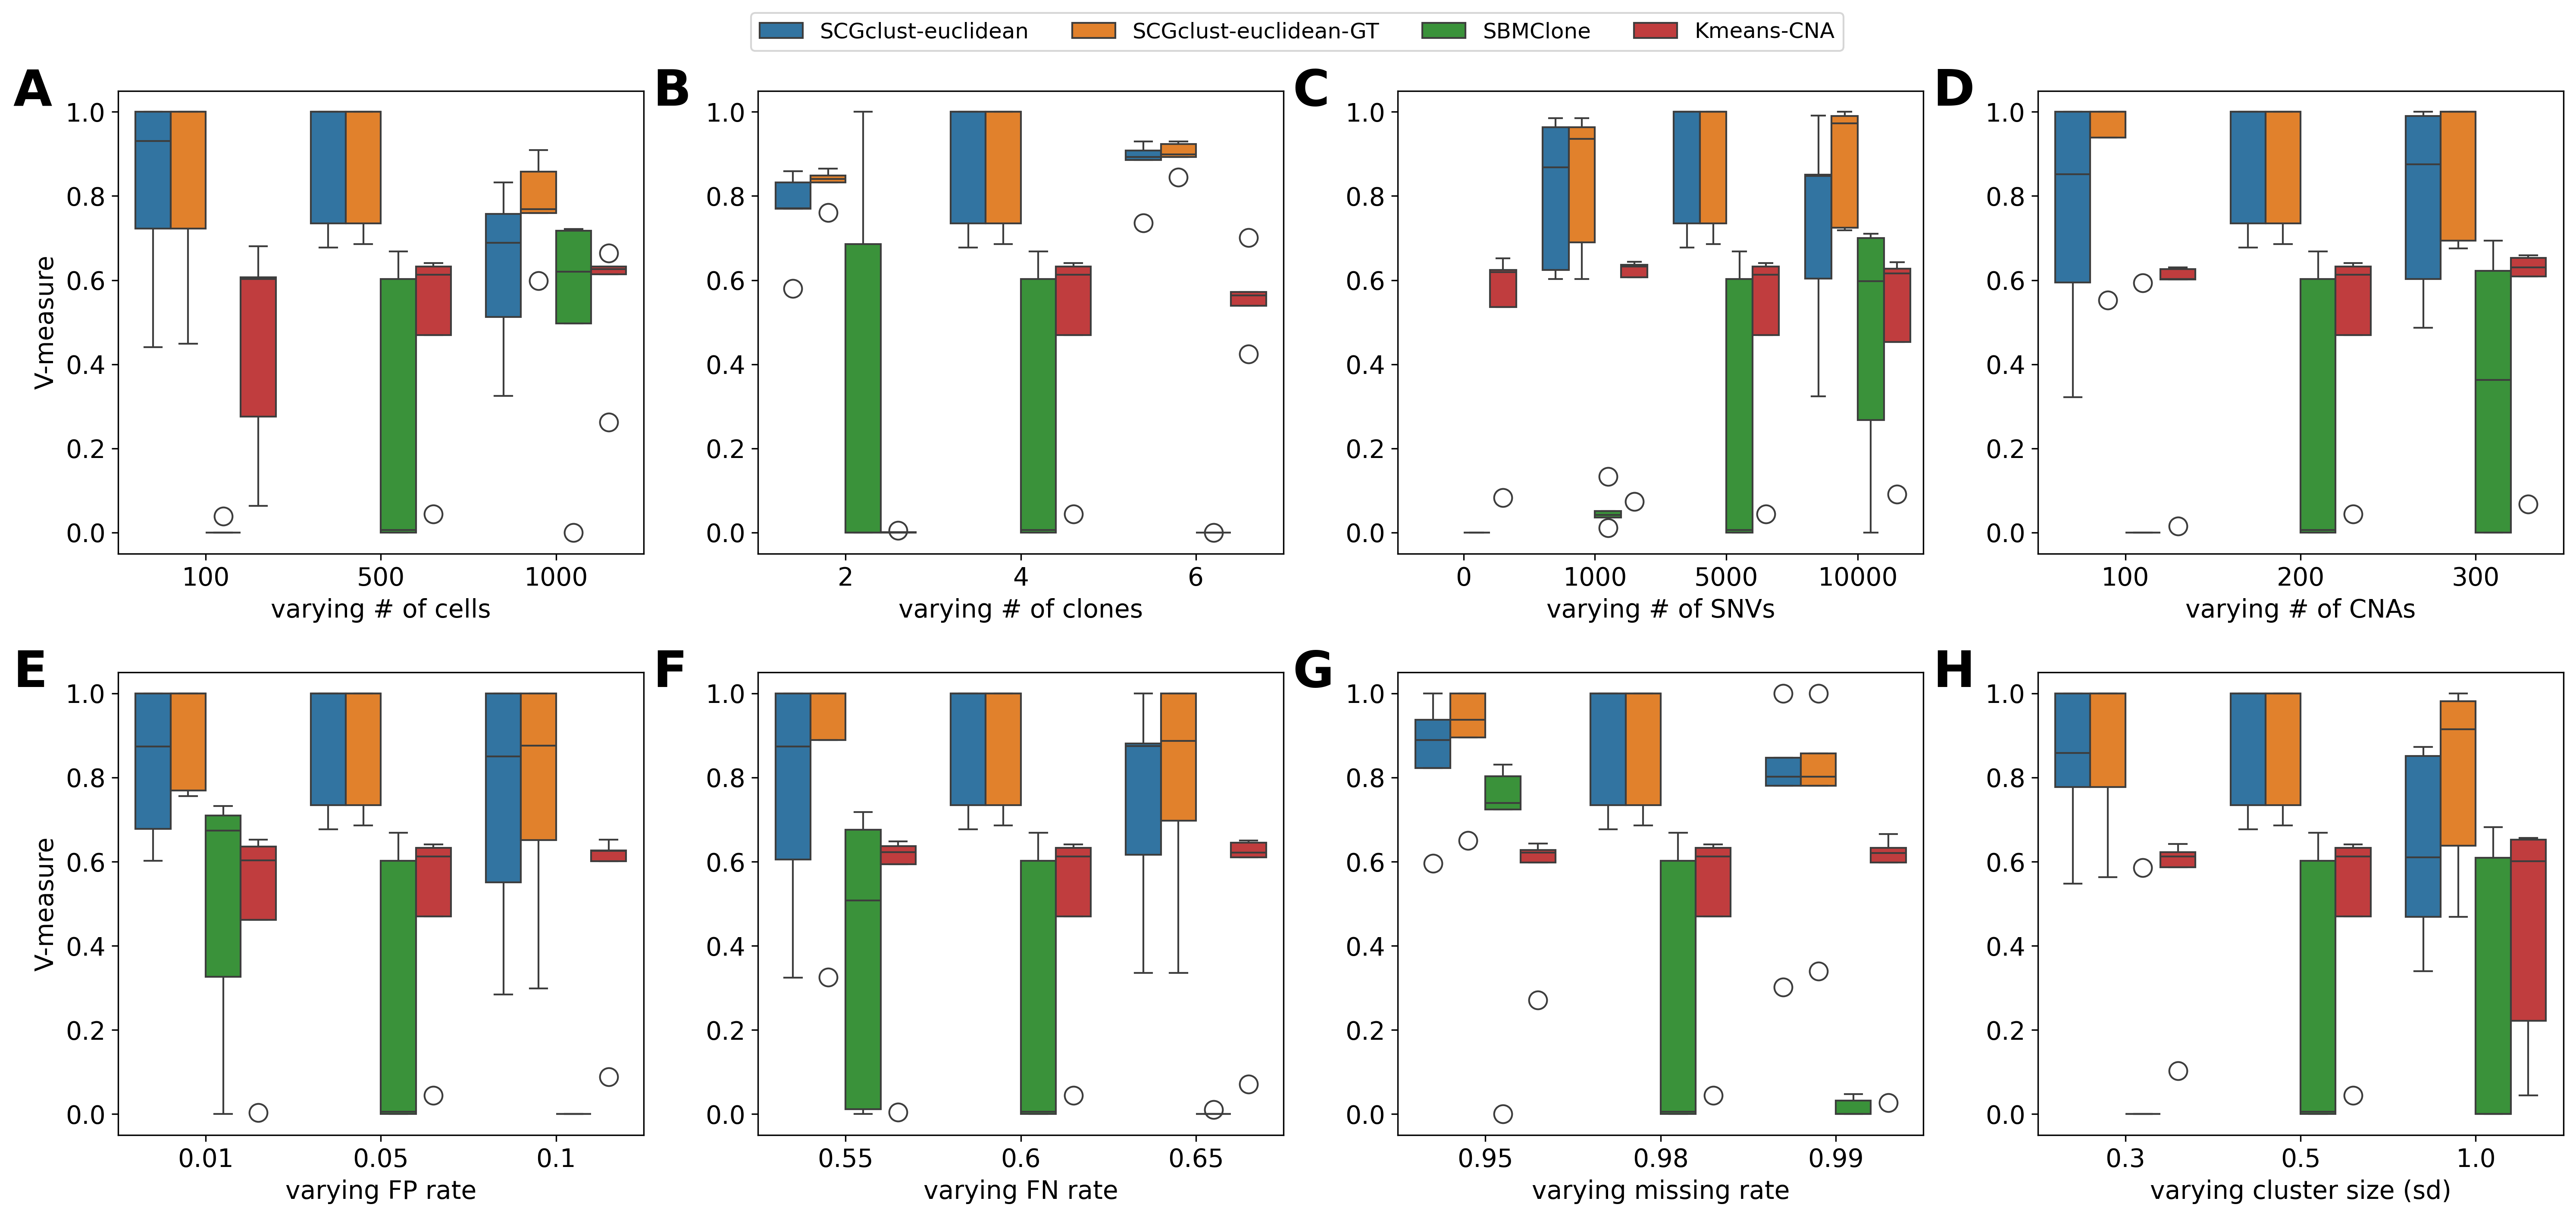

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

plt.rcParams['figure.figsize'] = (9.0, 9.0)
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['figure.dpi'] = 300
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42
plt.rcParams['lines.markersize'] = 10

# Set global font size
plt.rcParams.update({'font.size': 14})

# Read the CSV file
data = pd.read_csv("results_10292025/results_combined0122_dot.csv")

# Default settings
default_settings = {
    'varying # of clones': 4,
    'varying # of snvs': 5000,
    'varying # of cnas': 200,
    'varying # of cells': 500,
    'varying FP rate': 0.05,
    'varying FN rate': 0.6,
    'varying missing rate': 0.98,
    'varying cluster size (sd)': 0.5
}

# Data with default settings
data_default = data.copy()
for key, value in default_settings.items():
    data_default = data_default[data_default[key] == value]

# Melt the data for combined plotting - v_measure_dot, v_measure_cosine, v_measure_pearson, v_measure_euclidean
data_melted = pd.melt(data, id_vars=list(default_settings.keys()), value_vars=['SCGclust-euclidean', 'SCGclust-euclidean-GT', 'SBMClone', 'Kmeans-CNA'],
                      var_name='Methods compared', value_name='V-measure')

# Set up the figure and axes
fig, axes = plt.subplots(2, 4, figsize=(20, 10))

# Variables to plot
variables = ['varying # of cells', 'varying # of clones', 'varying # of snvs', 'varying # of cnas']

# Subplot labels
subplot_labels = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H']

# Iterate over the variables to create boxplots
for i, var in enumerate(variables):
    data_var = data_melted[data_melted[var] != default_settings[var]].copy()
    data_var = pd.concat([data_default.melt(id_vars=list(default_settings.keys()),
                                            value_vars=['SCGclust-euclidean', 'SCGclust-euclidean-GT', 'SBMClone', 'Kmeans-CNA'],
                                            var_name='Methods compared',
                                            value_name='V-measure'), data_var])
    sns.boxplot(x=var, y='V-measure', hue='Methods compared', data=data_var, ax=axes[0, i])
    print(var)
    if var == 'varying # of snvs':
        var = 'varying # of SNVs'
    if var == 'varying # of cnas':
        var = 'varying # of CNAs'
    axes[0, i].set_xlabel(var)
    if i != 0:  # Remove y-axis label except for the leftmost plot
        axes[0, i].set_ylabel('')
    axes[0, i].text(-0.2, 1.05, subplot_labels[i], transform=axes[0, i].transAxes, fontsize=28, fontweight='bold', va='top')

# Remaining variables
remaining_vars = [col for col in data.columns if col not in variables + ['SCGclust-euclidean', 'SCGclust-euclidean-GT', 'SBMClone', 'Kmeans-CNA', 'path', 'rep', 'run_time', 'best_epoch', 'missclassified']]

for i, var in enumerate(remaining_vars):
    data_var = data_melted[data_melted[var] != default_settings[var]].copy()
    data_var = pd.concat([data_default.melt(id_vars=list(default_settings.keys()),
                                            value_vars=['SCGclust-euclidean', 'SCGclust-euclidean-GT', 'SBMClone', 'Kmeans-CNA'],
                                            var_name='Methods compared', value_name='V-measure'), data_var])
    sns.boxplot(x=var, y='V-measure', hue='Methods compared', data=data_var, ax=axes[1, i % 4])
    axes[1, i % 4].set_xlabel(var)
    if i % 4 != 0:  # Remove y-axis label except for the leftmost plot in each row
        axes[1, i % 4].set_ylabel('')
    axes[1, i % 4].text(-0.2, 1.05, subplot_labels[4 + i], transform=axes[1, i % 4].transAxes, fontsize=28, fontweight='bold', va='top')

# Remove legends from individual subplots
for ax in axes.flatten():
    ax.legend_.remove()

# Add a single legend for the entire figure
handles, labels = axes[1, 0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 0.95), ncol=4, fontsize=12)

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.92])  # Leave space for the legend on the top

# Save the figure
# plt.savefig('/maiziezhou_lab/yunfei/Projects/cellClustering_GNN/results_for_plotting/simulated_data_bp0122.pdf', format='pdf')
plt.show()

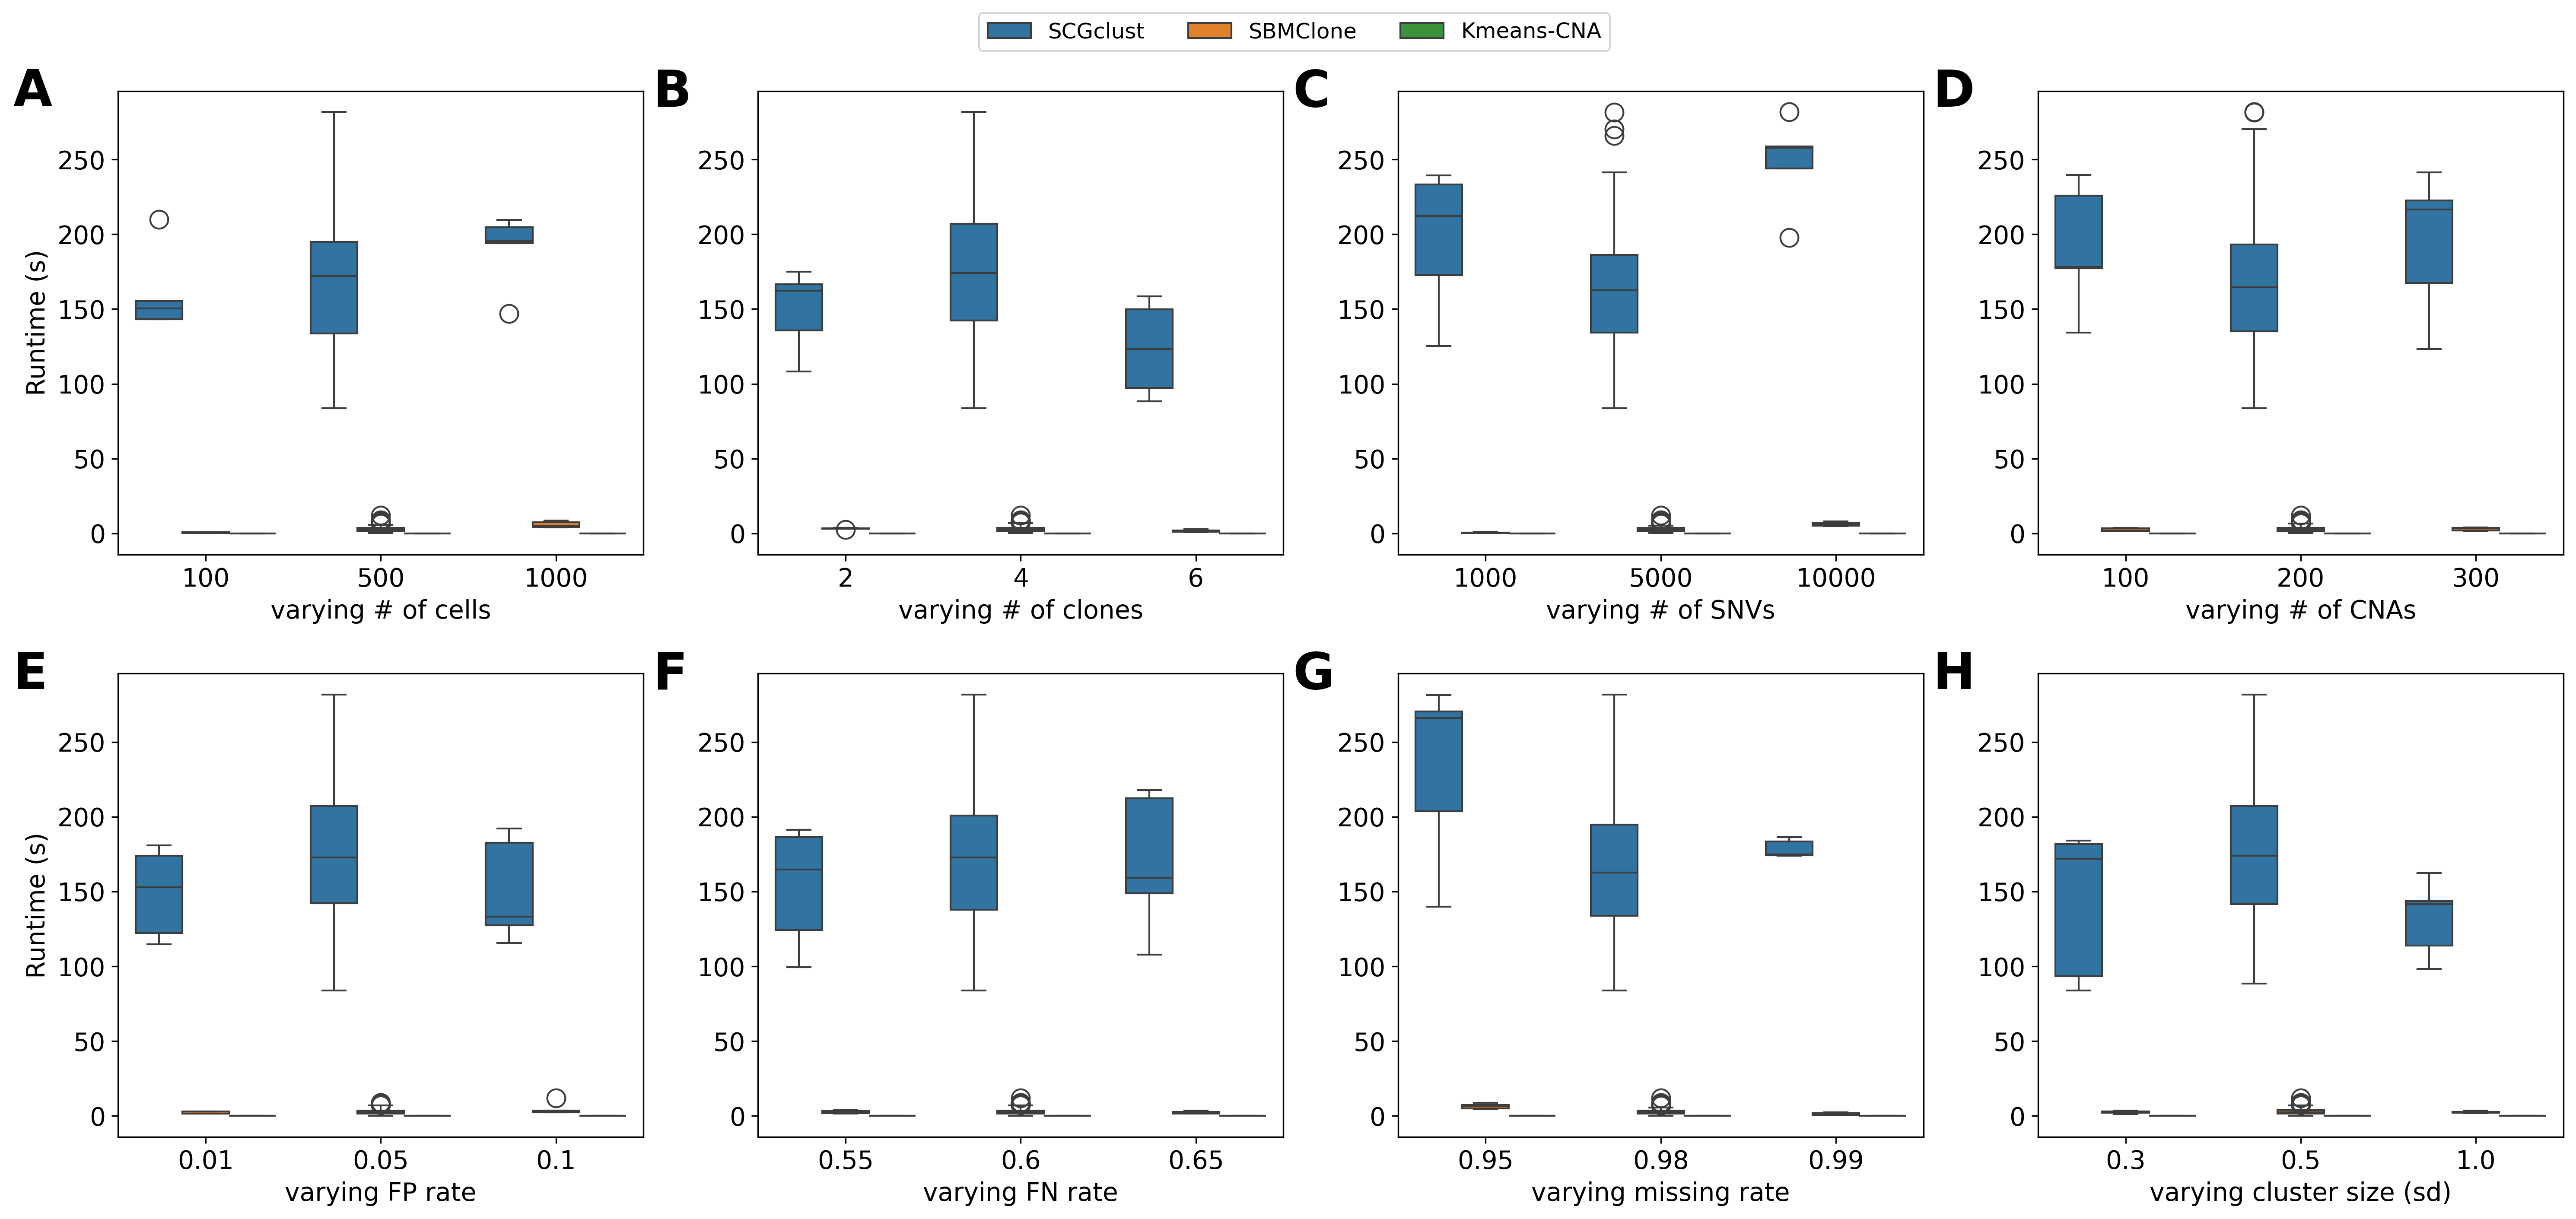

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

plt.rcParams['figure.figsize'] = (9.0, 9.0)
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['figure.dpi'] = 300
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42
plt.rcParams['lines.markersize'] = 10
plt.rcParams.update({'font.size': 14})

# Read the CSV file
data = pd.read_csv("/maiziezhou_lab/yunfei/Projects/cellClustering_GNN/results_for_plotting/results_combined0122_time.csv")

# Default settings
default_settings = {
    'varying # of clones': 4,
    'varying # of snvs': 5000,
    'varying # of cnas': 200,
    'varying # of cells': 500,
    'varying FP rate': 0.05,
    'varying FN rate': 0.6,
    'varying missing rate': 0.98,
    'varying cluster size (sd)': 0.5
}

# Melt runtime columns
runtime_melted = pd.melt(
    data,
    id_vars=list(default_settings.keys()),
    value_vars=['our_runtime', 'SBMClone_measure_runtime', 'km_measure_runtime'],
    var_name='Method',
    value_name='Runtime (s)'
)

# Rename methods for plotting
method_map = {
    'our_runtime': 'SCGclust',
    'SBMClone_measure_runtime': 'SBMClone',
    'km_measure_runtime': 'Kmeans-CNA'
}
runtime_melted['Method'] = runtime_melted['Method'].map(method_map)

# Variables to plot
variables = [
    'varying # of cells',
    'varying # of clones',
    'varying # of snvs',
    'varying # of cnas',
    'varying FP rate',
    'varying FN rate',
    'varying missing rate',
    'varying cluster size (sd)'
]

# Set up subplots
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
subplot_labels = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H']

# Make boxplots
for i, var in enumerate(variables):
    ax = axes[i // 4, i % 4]
    sns.boxplot(x=var, y='Runtime (s)', hue='Method', data=runtime_melted, ax=ax)
    ax.set_xlabel(var.replace("snvs", "SNVs").replace("cnas", "CNAs"))
    
    # Add y-label only to leftmost plots
    if i % 4 == 0:
        ax.set_ylabel("Runtime (s)")
    else:
        ax.set_ylabel("")
    
    # Add subplot label
    ax.text(-0.2, 1.05, subplot_labels[i], transform=ax.transAxes,
            fontsize=28, fontweight='bold', va='top')
    
    # Remove duplicate legends
    if ax.get_legend() is not None:
        ax.get_legend().remove()

# Shared legend
handles, labels = axes[0, 0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 0.95), ncol=3, fontsize=12)

plt.tight_layout(rect=[0, 0, 1, 0.92])
plt.savefig('/maiziezhou_lab/yunfei/Projects/cellClustering_GNN/results_for_plotting/simulated_data_runtime.pdf', format='pdf')
plt.show()


0.001
